In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

 Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


 <font size="4">In this notebook we will try to replicate various figures from J. Gross and G. Sadowski's 2002 paper</font>

## Figure 1

In [2]:
# Setting up the models
methanol = system(["methanol"],"PCSAFT")
pentanol = system(["1-pentanol"],"PCSAFT")
nonanol  = system(["1-nonanol"],"PCSAFT");

In [3]:
# Get critical point for all species
(T_c_methanol, p_c_methanol, v_c_methanol) = get_crit_pure(methanol)
(T_c_pentanol, p_c_pentanol, v_c_pentanol) = get_crit_pure(pentanol)
(T_c_nonanol, p_c_nonanol, v_c_nonanol)    = get_crit_pure(nonanol);

In [4]:
# Get saturation properties for all species
T_methanol      = range(205, T_c_methanol*0.99, length = 40)
T_pentanol    = range(200, T_c_pentanol*0.99, length = 40)
T_nonanol      = range(260, T_c_nonanol*0.99, length = 40)

A = get_sat_pure.(methanol,T_methanol)
B = get_sat_pure.(pentanol,T_pentanol)
C = get_sat_pure.(nonanol,T_nonanol)

v_l_methanol = append!([A[i][2] for i in 1:length(T_methanol)],v_c_methanol)
v_v_methanol = append!([A[i][3] for i in 1:length(T_methanol)],v_c_methanol)
v_l_pentanol = append!([B[i][2] for i in 1:length(T_pentanol)],v_c_pentanol)
v_v_pentanol = append!([B[i][3] for i in 1:length(T_pentanol)],v_c_pentanol)
v_l_nonanol = append!([C[i][2] for i in 1:length(T_nonanol)],v_c_nonanol)
v_v_nonanol = append!([C[i][3] for i in 1:length(T_nonanol)],v_c_nonanol)

T_methanol      = append!(collect(T_methanol),T_c_methanol)
T_pentanol    = append!(collect(T_pentanol),T_c_pentanol)
T_nonanol      = append!(collect(T_nonanol),T_c_nonanol);

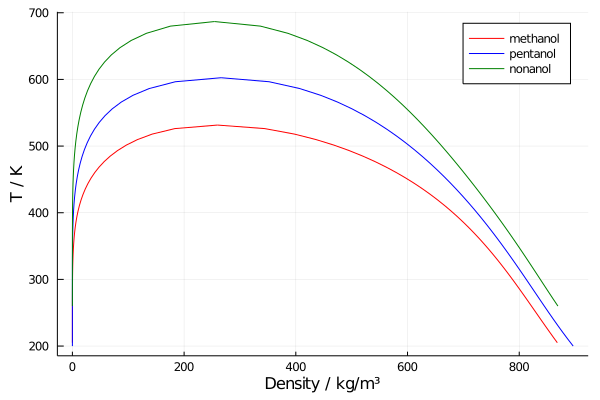

In [5]:
plt = plot(0.032 ./v_l_methanol, T_methanol,color=:red,xlabel="Density / kg/m³",ylabel="T / K", label = "methanol")
plt = plot!(0.032 ./v_v_methanol, T_methanol,color=:red, label = "")
plt = plot!(0.088 ./v_l_pentanol, T_pentanol,color=:blue, label = "pentanol")
plt = plot!(0.088 ./v_v_pentanol, T_pentanol,color=:blue, label = "")
plt = plot!(0.144 ./v_l_nonanol, T_nonanol,color=:green, label = "nonanol")
plt = plot!(0.144 ./v_v_nonanol, T_nonanol,color=:green, label = "")
display(plt)

## Figure 2

In [6]:
# Initiate system
methanol = system(["methanol"],"PCSAFT")
isobutane = system(["isobutane"],"PCSAFT")
mix = system(["isobutane","methanol"],"PCSAFT");

In [7]:
# Obtain saturation pressure of less volatile component
(P_sat_1,v_l,v_v) = get_sat_pure(isobutane, 373.15)
(P_sat_2,v_l,v_v) = get_sat_pure(methanol, 373.15);

In [8]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 373.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[1])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

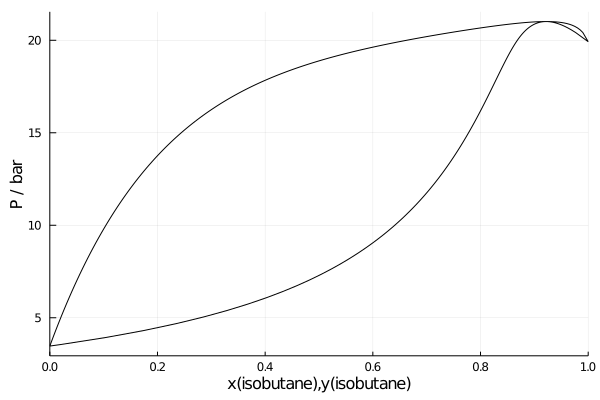

In [9]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(isobutane),y(isobutane)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 4

In [10]:
# Initiate system
pentanol = system(["1-pentanol"],"PCSAFT")
benzene = system(["benzene"],"PCSAFT")
mix = system(["benzene","1-pentanol"],"PCSAFT");

In [11]:
# Obtain saturation pressure of less volatile component
(P_sat_1,v_l,v_v) = get_sat_pure(benzene, 313.15)
(P_sat_2,v_l,v_v) = get_sat_pure(pentanol, 313.15);

In [12]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 313.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[1])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

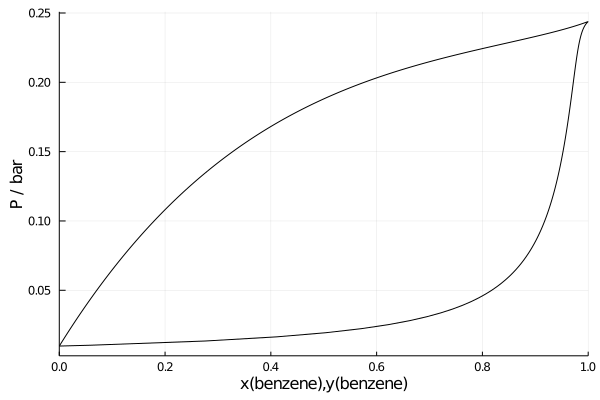

In [13]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(benzene),y(benzene)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 5

In [14]:
# Initiate system
propanol_1 = system(["1-propanol"],"PCSAFT")
propanol_2 = system(["2-propanol"],"PCSAFT")
benzene = system(["benzene"],"PCSAFT")
mix_1 = system(["benzene","1-propanol"],"PCSAFT")
mix_2 = system(["benzene","2-propanol"],"PCSAFT");

In [15]:
# Obtain saturation pressure of less volatile component
(P_sat_1,v_l,v_v) = get_sat_pure(propanol_1, 313.15)
(P_sat_2,v_l,v_v) = get_sat_pure(propanol_2, 313.15)
(P_sat_3,v_l,v_v) = get_sat_pure(benzene, 313.15);

In [16]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix_1, 313.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_3[1])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_1[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

In [17]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix_2, 313.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
append!(x_2,1.)
append!(y_2,1.)
append!(P_sat_mix_2,P_sat_3[1])
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat_2[1])
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2));

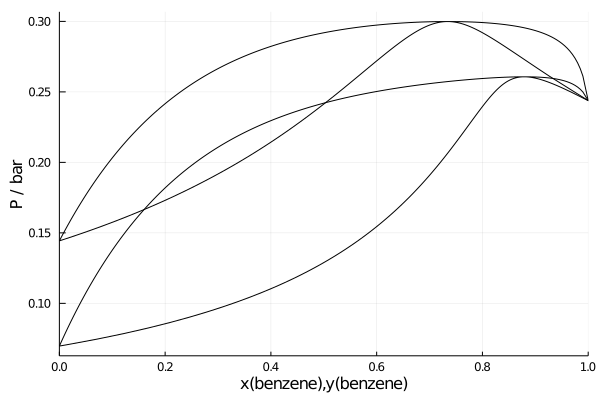

In [18]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(benzene),y(benzene)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(benzene),y(benzene)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 6

In [19]:
# Initiate system
butanol = system(["1-butanol"],"PCSAFT")
butane = system(["butane"],"PCSAFT")
mix = system(["butane","1-butanol"],"PCSAFT");

In [20]:
# Obtain saturation pressure of less volatile component
T_but = [333.15,373.15]
T_butoh = [333.15,373.15,433.15,473.15]
A = get_sat_pure.(butane, T_but)
B = get_sat_pure.(butanol, T_butoh)
P_sat_1 = [A[i][1] for i in 1:length(T_but)]
P_sat_2 = [B[i][1] for i in 1:length(T_butoh)];

In [21]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 333.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[1])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

In [22]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 373.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
append!(x_2,1.)
append!(y_2,1.)
append!(P_sat_mix_2,P_sat_1[2])
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat_2[2])
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2));

In [23]:
# Obtain mixture saturation conditions 3

# x composition
x = range(1e-3,0.98,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_3,v_l,v_v,y) = get_bubble_pressure(mix, 433.15, x);

# Concantenate results
x_3 = x[:,1]
y_3 = y[:,1]
pushfirst!(x_3,0.)
pushfirst!(y_3,0.)
pushfirst!(P_sat_mix_3,P_sat_2[3])
z_3 = vcat(x_3,reverse(y_3))
P_sat_mix_3 = vcat(P_sat_mix_3,reverse(P_sat_mix_3));

In [24]:
# Obtain mixture saturation conditions 4

# x composition
x = range(1e-3,0.73,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_4,v_l,v_v,y) = get_bubble_pressure(mix, 473.15, x);

# Concantenate results
x_4 = x[:,1]
y_4 = y[:,1]
pushfirst!(x_4,0.)
pushfirst!(y_4,0.)
pushfirst!(P_sat_mix_4,P_sat_2[4])
z_4 = vcat(x_4,reverse(y_4))
P_sat_mix_4 = vcat(P_sat_mix_4,reverse(P_sat_mix_4));

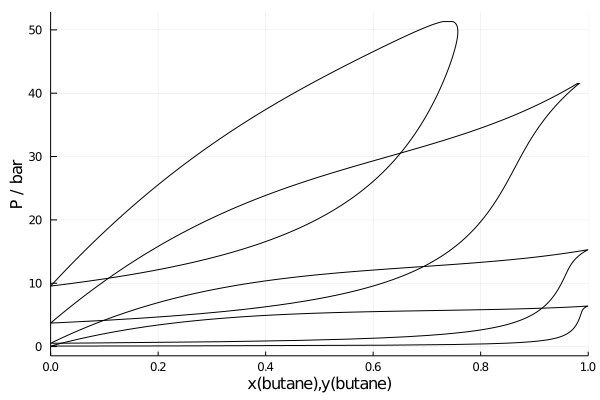

In [25]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(butane),y(butane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="")
plt = plot!(z_3,P_sat_mix_3/1e5,color=:black,label="")
plt = plot!(z_4,P_sat_mix_4/1e5,color=:black,label="")
display(plt)

## Figure 7

In [26]:
# Initiate system
ethanol = system(["ethanol"],"PCSAFT")
butane = system(["butane"],"PCSAFT")
mix = system(["butane","ethanol"],"PCSAFT");

In [27]:
# Obtain saturation pressure of less volatile component
T_but = [373.15,413.15]
T_etoh = [373.15,413.15,433.15,463.15]
A = get_sat_pure.(butane, T_but)
B = get_sat_pure.(ethanol, T_etoh)
P_sat_1 = [A[i][1] for i in 1:length(T_but)]
P_sat_2 = [B[i][1] for i in 1:length(T_etoh)];

In [28]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 373.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[1])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

In [29]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 413.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
append!(x_2,1.)
append!(y_2,1.)
append!(P_sat_mix_2,P_sat_1[2])
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat_2[2])
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2));

In [30]:
# Obtain mixture saturation conditions 3

# x composition
x = range(1e-3,0.85,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_3,v_l,v_v,y) = get_bubble_pressure(mix, 433.15, x);

# Concantenate results
x_3 = x[:,1]
y_3 = y[:,1]
pushfirst!(x_3,0.)
pushfirst!(y_3,0.)
pushfirst!(P_sat_mix_3,P_sat_2[3])
z_3 = vcat(x_3,reverse(y_3))
P_sat_mix_3 = vcat(P_sat_mix_3,reverse(P_sat_mix_3));

In [31]:
# Obtain mixture saturation conditions 4

# x composition
x = range(1e-3,0.535,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_4,v_l,v_v,y) = get_bubble_pressure(mix, 463.15, x);

# Concantenate results
x_4 = x[:,1]
y_4 = y[:,1]
pushfirst!(x_4,0.)
pushfirst!(y_4,0.)
pushfirst!(P_sat_mix_4,P_sat_2[4])
z_4 = vcat(x_4,reverse(y_4))
P_sat_mix_4 = vcat(P_sat_mix_4,reverse(P_sat_mix_4));

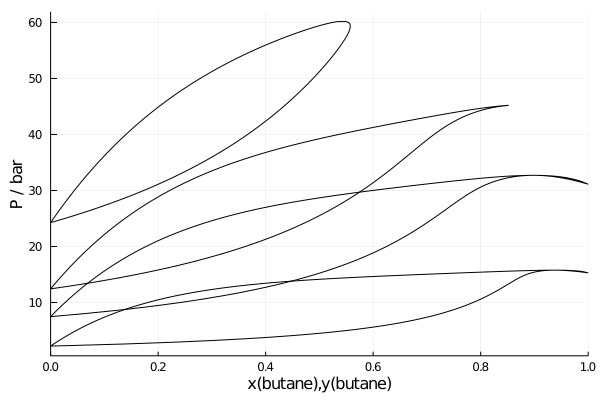

In [32]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(butane),y(butane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="")
plt = plot!(z_3,P_sat_mix_3/1e5,color=:black,label="")
plt = plot!(z_4,P_sat_mix_4/1e5,color=:black,label="")
display(plt)